### EDA

In [1]:
import pandas as pd
df = pd.read_csv("supermarket.zip")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.size

1000

In [6]:
df.shape

(200, 5)

In [7]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df_updated = df.drop("CustomerID", axis = 1)
for col in df_updated:
    if df[col].dtypes == "int64" :
        print(f"{col} ortalama : {df[col].mean()}")

Age ortalama : 38.85
Annual Income (k$) ortalama : 60.56
Spending Score (1-100) ortalama : 50.2


In [10]:
df.groupby("Gender")["Age"].mean()

Gender
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

In [11]:
df.groupby("Gender")["Annual Income (k$)"].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [12]:
df.groupby("Gender")["Spending Score (1-100)"].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

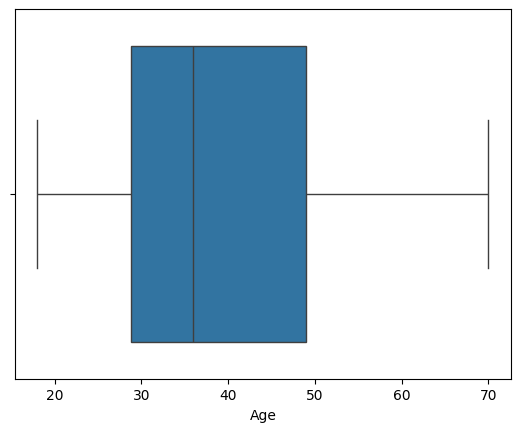

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.boxplot(x=df["Age"])
plt.show()

In [14]:
df["Age"].min()

18

In [15]:
df["Age"].max()

70

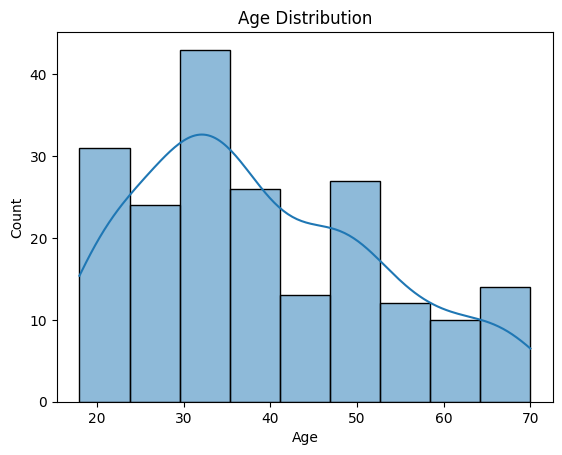

In [16]:
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()


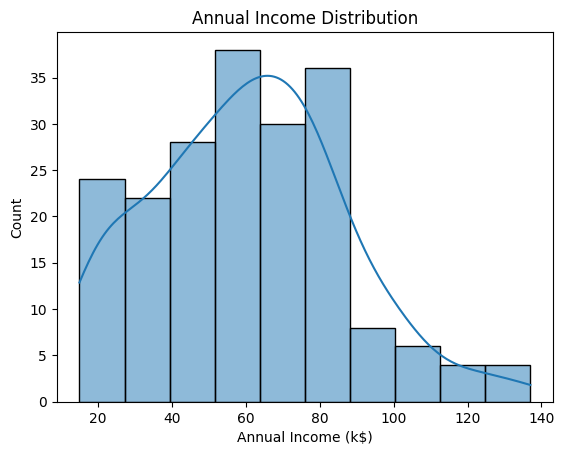

In [17]:
sns.histplot(df["Annual Income (k$)"], kde=True)
plt.title("Annual Income Distribution")
plt.show()

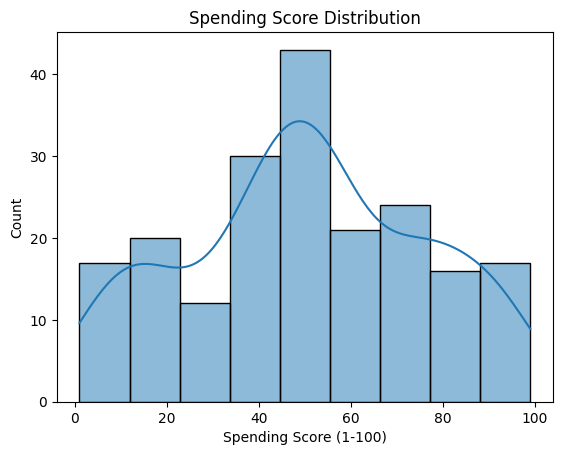

In [18]:
sns.histplot(df["Spending Score (1-100)"], kde=True)
plt.title("Spending Score Distribution")
plt.show()

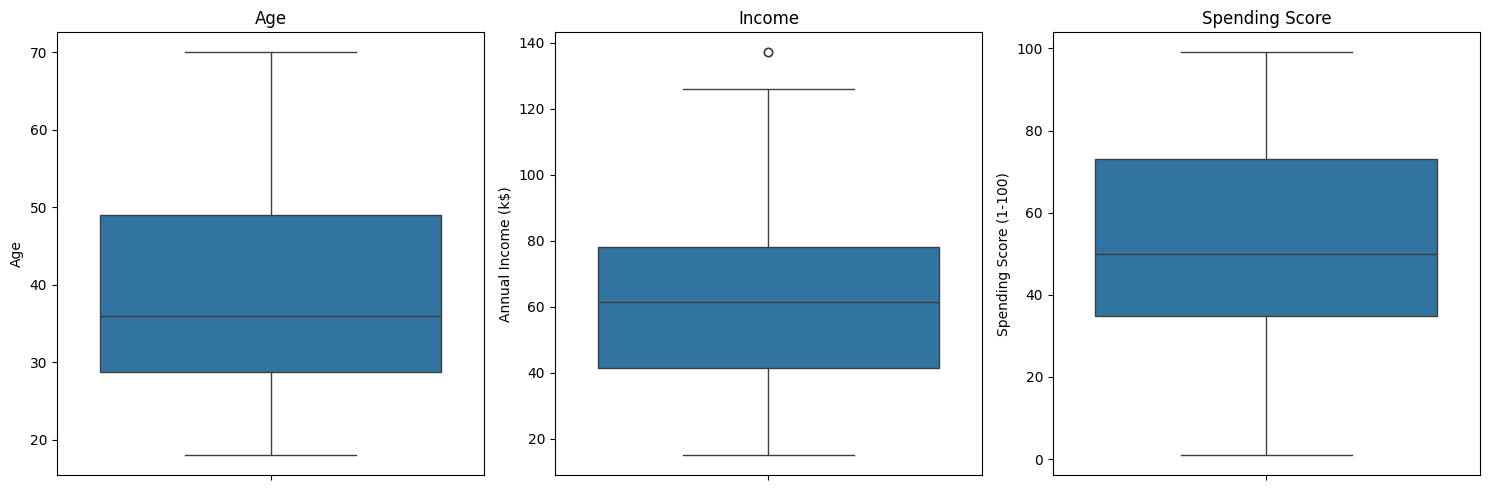

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df["Age"], ax=axes[0])
axes[0].set_title("Age")

sns.boxplot(y=df["Annual Income (k$)"], ax=axes[1])
axes[1].set_title("Income")

sns.boxplot(y=df["Spending Score (1-100)"], ax=axes[2])
axes[2].set_title("Spending Score")

plt.tight_layout()
plt.show()


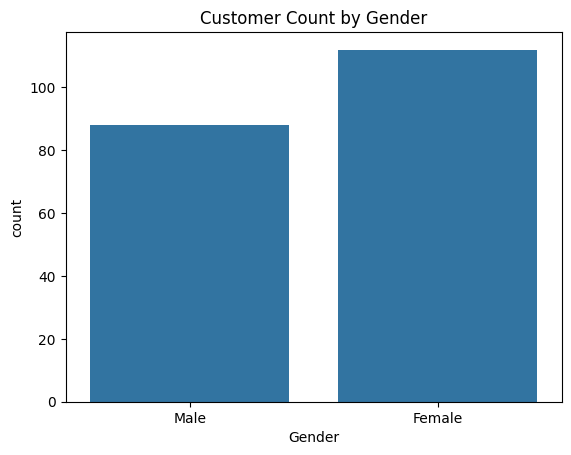

In [20]:
sns.countplot(x="Gender", data=df)
plt.title("Customer Count by Gender")
plt.show()

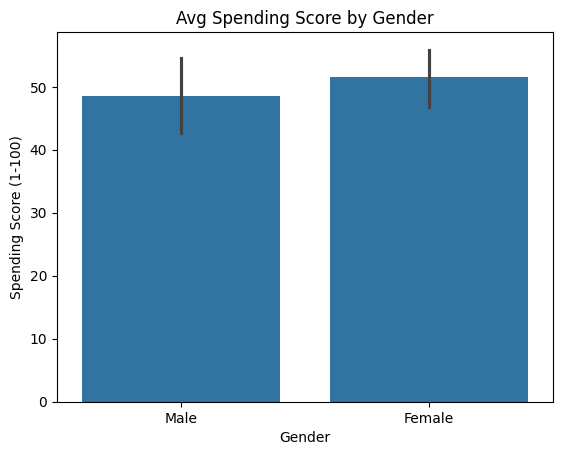

In [21]:
sns.barplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.title("Avg Spending Score by Gender")
plt.show()

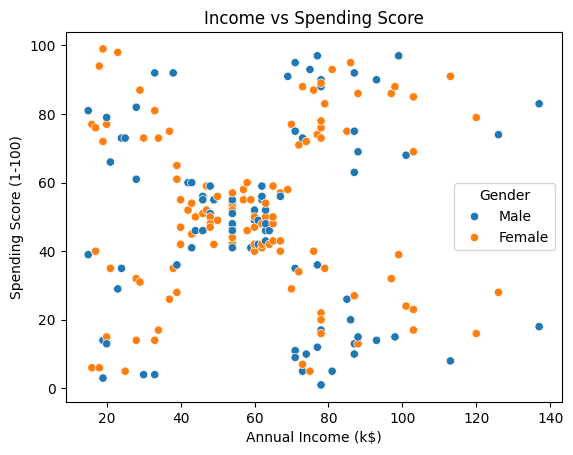

In [22]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Income vs Spending Score")
plt.show()

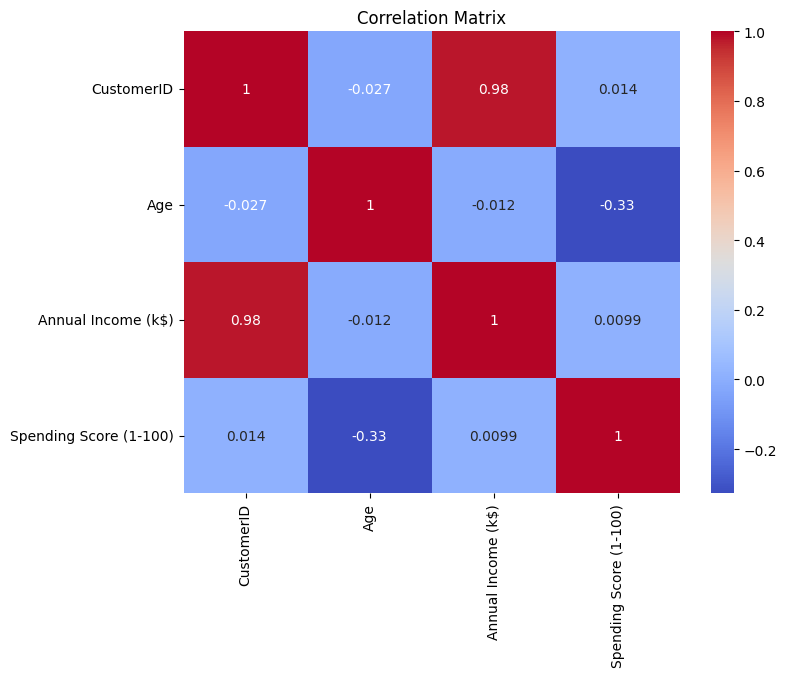

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])


In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### K-MEANS

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

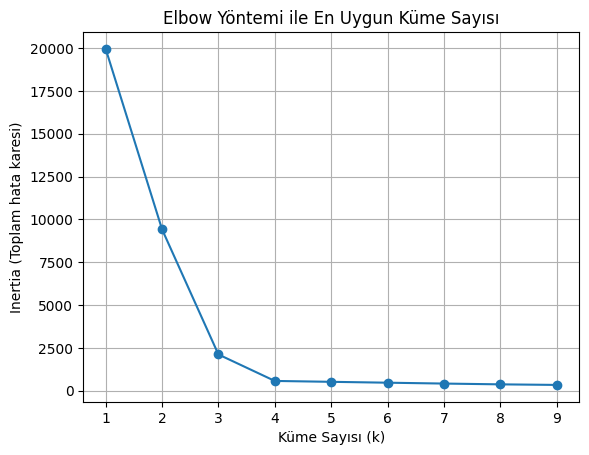

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Veri üretimi (örnek olarak)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# 2. Elbow yöntemi için farklı küme sayıları deniyoruz
inertia_values = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# 3. Elbow grafiği
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (Toplam hata karesi)')
plt.title('Elbow Yöntemi ile En Uygun Küme Sayısı')
plt.grid(True)
plt.show()


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


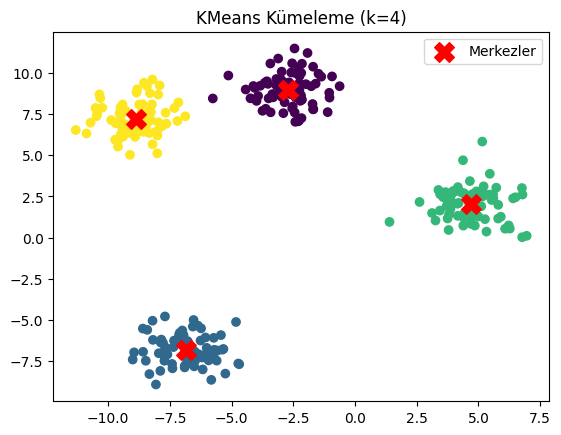

In [37]:
# 4. Seçilen küme sayısı ile KMeans uygulama
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

# 5. Küme sonuçlarını çiz
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Merkezler')
plt.title(f"KMeans Kümeleme (k={optimal_k})")
plt.legend()
plt.show()


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

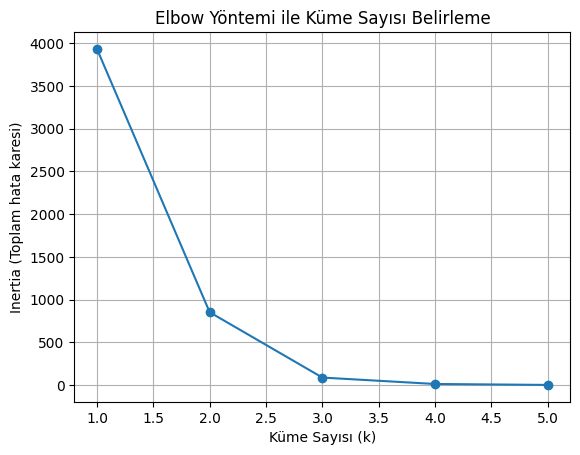

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        1
1       1   21                  15                      81        0
2       0   20                  16                       6        2
3       0   23                  16                      77        0
4       0   31                  17                      40        1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Veri oluşturma
data = {
    'Gender': [1, 1, 0, 0, 0],
    'Age': [19, 21, 20, 23, 31],
    'Annual Income (k$)': [15, 15, 16, 16, 17],
    'Spending Score (1-100)': [39, 81, 6, 77, 40]
}

df = pd.DataFrame(data)

# Özellik matrisi (X)
X = df.values

# Elbow yöntemi ile küme sayısı belirleme
inertia = []
k_range = range(1, 6)  # 1'den 5'e kadar deneyelim
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (Toplam hata karesi)')
plt.title('Elbow Yöntemi ile Küme Sayısı Belirleme')
plt.grid(True)
plt.show()

# Diyelim ki uygun küme sayısı 3 çıktı
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

df['Cluster'] = labels
print(df)


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

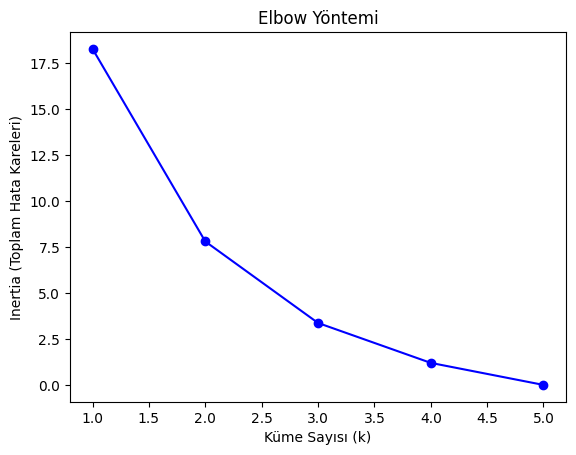

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


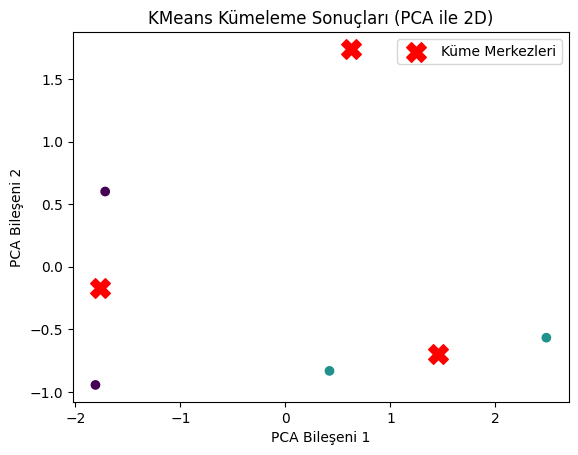

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Veri (örnek veri setini kendine göre ayarla)
data = {
    'Gender': [1, 1, 0, 0, 0],  # 1: Male, 0: Female
    'Age': [19, 21, 20, 23, 31],
    'Annual Income (k$)': [15, 15, 16, 16, 17],
    'Spending Score (1-100)': [39, 81, 6, 77, 40]
}

df = pd.DataFrame(data)

# 2. Özellikleri seç (CustomerID yok, Gender sayısal oldu)
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA ile 2 bileşene indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Elbow yöntemi ile en uygun küme sayısı belirleme
inertia = []
k_range = range(1, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (Toplam Hata Kareleri)')
plt.title('Elbow Yöntemi')
plt.show()

# 6. Optimal küme sayısı diyelim ki 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 7. Kümeleme sonuçlarını görselleştir
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Küme Merkezleri')
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.title('KMeans Kümeleme Sonuçları (PCA ile 2D)')
plt.legend()
plt.show()


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

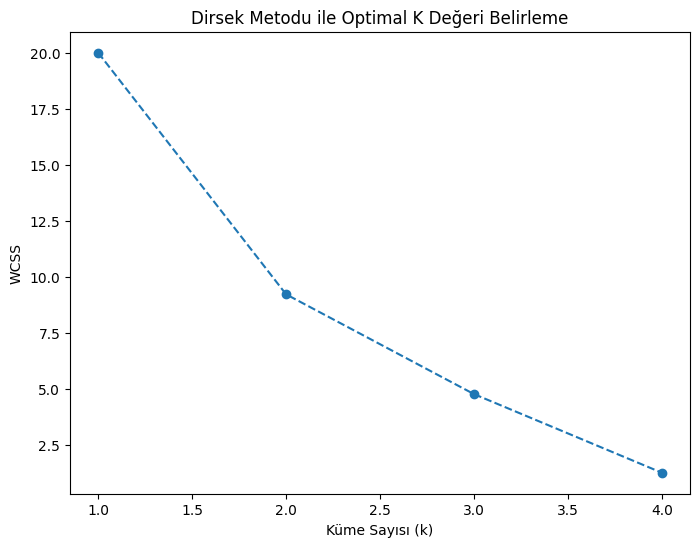

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Küme Etiketleri:
 kume
0    2
1    2
2    1
Name: count, dtype: int64

Ölçeklendirilmiş Küme Merkezleri:
      Gender       Age  Annual Income (k$)  Spending Score (1-100)
0 -0.816497  0.974901            0.935414                0.357366
1  1.224745 -0.649934           -1.069045                0.411512
2 -0.816497 -0.649934            0.267261               -1.537756

Orijinal Ölçekteki Küme Merkezleri:
    Gender   Age  Annual Income (k$)  Spending Score (1-100)
0     0.0  27.0                16.5                    58.5
1     1.0  20.0                15.0                    60.0
2     0.0  20.0                16.0                     6.0


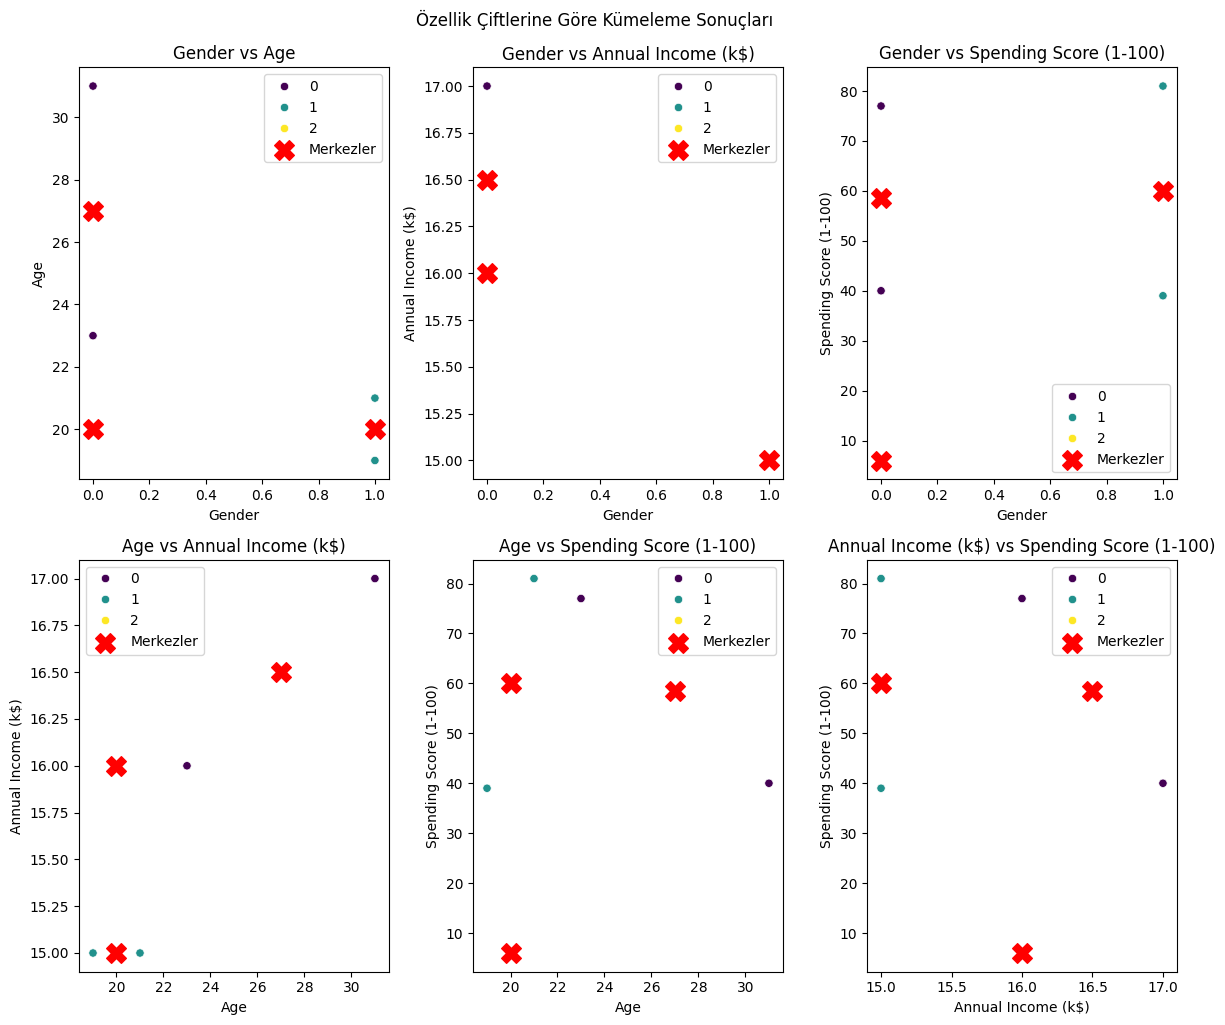

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Veri setinde 4 özellik olduğunu varsayalım.
# Özellik sütunlarının adlarını belirtin.
ozellik_isimleri = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[ozellik_isimleri]

# 2. Özellik Ölçeklendirme
# K-Means mesafeye dayalı bir algoritma olduğu için ölçeklendirme önemlidir.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pandas DataFrame'ine geri dönüştürelim (isteğe bağlı)
X_scaled_df = pd.DataFrame(X_scaled, columns=ozellik_isimleri)


# 3. Optimal K Değerini Belirleme (Dirsek Metodu Örneği)
# Farklı k değerleri için WCSS (küme içi kareler toplamı) hesaplayalım.
wcss = []
for i in range(1, min(len(X_scaled), 11)):  # Küme sayısını örnek sayısı veya 10 ile sınırla
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Dirsek grafiğini çizelim
plt.figure(figsize=(8, 6))
# x ekseni için range'i wcss listesinin uzunluğuna göre oluşturuyoruz
plt.plot(range(1, len(wcss) + 1), wcss, marker='o', linestyle='--')
plt.title('Dirsek Metodu ile Optimal K Değeri Belirleme')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('WCSS')
plt.show()

# Bu grafiğe bakarak WCSS'nin belirgin bir şekilde azalmayı bıraktığı noktayı (dirsek) seçebilirsiniz.
# Örneğin, dirsek noktası k=3 olabilir.

# 4. K-Means Modelini Oluşturma ve Eğitme
# Optimal k değerini buraya girin (örneğin k=3).
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Küme etiketlerini veri setine ekleyelim
df['kume'] = kmeans.labels_

# Küme merkezlerini (centroidler) alalım (ölçeklendirilmiş uzayda)
merkezler_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=ozellik_isimleri)

# Orijinal ölçekteki küme merkezlerini geri dönüştürelim (yorumlamak için daha kolay)
merkezler_original = scaler.inverse_transform(kmeans.cluster_centers_)
merkezler_original_df = pd.DataFrame(merkezler_original, columns=ozellik_isimleri)

# 5. Sonuçları İnceleme
print("\nKüme Etiketleri:\n", df['kume'].value_counts().sort_index())
print("\nÖlçeklendirilmiş Küme Merkezleri:\n", merkezler_scaled)
print("\nOrijinal Ölçekteki Küme Merkezleri:\n", merkezler_original_df)

# 6. Görselleştirme (Sadece 2 boyutu gösterebiliriz)
# Tüm boyutları aynı anda görselleştirmek zor olduğu için,
# özellik çiftleri arasındaki kümelemeyi inceleyebiliriz.

plt.figure(figsize=(12, 10))
ozellik_sayisi = len(ozellik_isimleri)
cift_sayisi = ozellik_sayisi * (ozellik_sayisi - 1) // 2
satir_sayisi = (cift_sayisi + 2) // 3  # Satır sayısını dinamik olarak hesapla (örneğin)
sutun_sayisi = min(cift_sayisi, 3)      # Sütun sayısını 3 ile sınırla

plot_index = 1
for i in range(ozellik_sayisi):
    for j in range(i + 1, ozellik_sayisi):
        plt.subplot(satir_sayisi, sutun_sayisi, plot_index)
        sns.scatterplot(data=df, x=ozellik_isimleri[i], y=ozellik_isimleri[j], hue='kume', palette='viridis')
        plt.scatter(merkezler_original[:, i], merkezler_original[:, j], marker='X', s=200, color='red', label='Merkezler')
        plt.title(f'{ozellik_isimleri[i]} vs {ozellik_isimleri[j]}')
        plt.xlabel(ozellik_isimleri[i])
        plt.ylabel(ozellik_isimleri[j])
        plt.legend()
        plot_index += 1

plt.tight_layout()
plt.suptitle('Özellik Çiftlerine Göre Kümeleme Sonuçları', y=1.02)
plt.show()